# Data Description and Attribute Information: 

The dataset consists of 10 000 data points stored as rows with 14 features in columns
UID: unique identifier ranging from 1 to 10000
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes
tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.
power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail

# Importing Libraries

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
from sklearn import preprocessing
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score
!pip install xgboost
from sklearn.preprocessing import MinMaxScaler, Normalizer
import warnings
warnings.filterwarnings("ignore")

# Loading DataSet

In [5]:
df=pd.read_csv('ai4i2020.csv')
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [6]:
df1 = df.copy()

# Exploratory Data Analysis

In [8]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [9]:
df.tail()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0

In [10]:
df.shape

(10000, 14)

In [11]:
df.size

140000

In [12]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [13]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [15]:
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [16]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns

In [19]:
df_numeric.skew()

UDI                         0.000000
Air temperature [K]         0.114274
Process temperature [K]     0.015027
Rotational speed [rpm]      1.993171
Torque [Nm]                -0.009517
Tool wear [min]             0.027292
Machine failure             5.151852
TWF                        14.644462
HDF                         9.164789
PWF                        10.114516
OSF                         9.953916
RNF                        22.879570
dtype: float64

In [20]:
df_numeric.corr().round(2)

UDI  Air temperature [K]  Process temperature [K]  \
UDI                      1.00                 0.12                     0.32   
Air temperature [K]      0.12                 1.00                     0.88   
Process temperature [K]  0.32                 0.88                     1.00   
Rotational speed [rpm]  -0.01                 0.02                     0.02   
Torque [Nm]              0.00                -0.01                    -0.01   
Tool wear [min]         -0.01                 0.01                     0.01   
Machine failure         -0.02                 0.08                     0.04   
TWF                      0.01                 0.01                     0.01   
HDF                     -0.02                 0.14                     0.06   
PWF                     -0.02                 0.00                    -0.00   
OSF                     -0.00                 0.00                     0.00   
RNF                     -0.01                 0.02                     0.02   

                         Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
UDI                                       -0.01         0.00            -0.01   
Air temperature [K]                        0.02        -0.01             0.01   
Process temperature [K]                    0.02        -0.01             0.01   
Rotational speed [rpm]                     1.00        -0.88             0.00   
Torque [Nm]                               -0.88         1.00            -0.00   
Tool wear [min]                            0.00        -0.00             1.00   
Machine failure                           -0.04         0.19             0.11   
TWF                                        0.01        -0.01             0.12   
HDF                                       -0.12         0.14            -0.00   
PWF                                        0.12         0.08            -0.01   
OSF                                       -0.10         0.18             0.16   
RNF                                       -0.01         0.02             0.01   

                         Machine failure   TWF   HDF   PWF   OSF   RNF  
UDI                                -0.02  0.01 -0.02 -0.02 -0.00 -0.01  
Air temperature [K]                 0.08  0.01  0.14  0.00  0.00  0.02  
Process temperature [K]             0.04  0.01  0.06 -0.00  0.00  0.02  
Rotational speed [rpm]             -0.04  0.01 -0.12  0.12 -0.10 -0.01  
Torque [Nm]                         0.19 -0.01  0.14  0.08  0.18  0.02  
Tool wear [min]                     0.11  0.12 -0.00 -0.01  0.16  0.01  
Machine failure                     1.00  0.36  0.58  0.52  0.53  0.00  
TWF                                 0.36  1.00 -0.01  0.01  0.04  0.03  
HDF                                 0.58 -0.01  1.00  0.02  0.05 -0.00  
PWF                                 0.52  0.01  0.02  1.00  0.12 -0.00  
OSF                                 0.53  0.04  0.05  0.12  1.00 -0.00  
RNF                                 0.00  0.03 -0.00 -0.00 -0.00  1.00

# Data Visulaization

## Correlation Matrix (Heat Map)

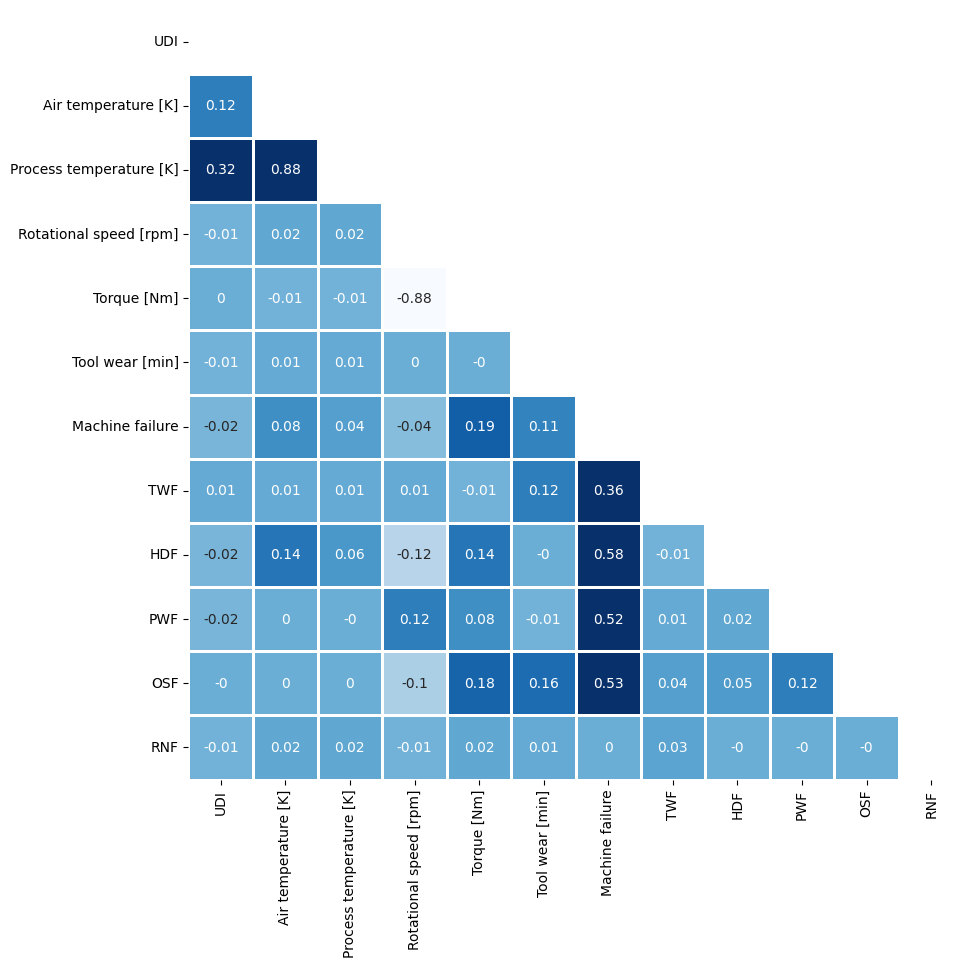

In [23]:
'''Plot Correlation Matrix'''


def corrMat(df, id=False, figsize=(10,10)):
    df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns
    corr_mat = df_numeric.corr().round(2)

    f, ax = plt.subplots(figsize=figsize)
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))  # Fixed dtype

    sns.heatmap(corr_mat, mask=mask, vmin=-0.3, vmax=0.3, center=0, 
                cmap='Blues', square=False, lw=2, annot=True, cbar=False)

# Example usage:
corrMat(df_numeric)

## Correaltion to Traget Variable only

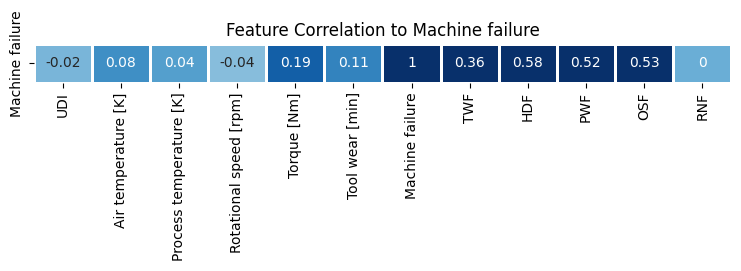

In [25]:

'''Plot Correlation to Target Variable only'''
def corrMat2(df,target='Machine failure',figsize=(9,0.5),ret_id=False):
    
    corr_mat = df.corr().round(2);shape = corr_mat.shape[0]
    corr_mat = corr_mat.transpose()
    corr = corr_mat.loc[:, df.columns == target].transpose().copy()
    if(ret_id is False):
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0, 
                     cmap='Blues',square=False,lw=2,annot=True,cbar=False)
        plt.title(f'Feature Correlation to {target}')
    
    if(ret_id):
        return corr
corrMat2(df.drop(['Type','Product ID'],axis = 1))

> ## Exploring Categorical Variables with bar and pie plots

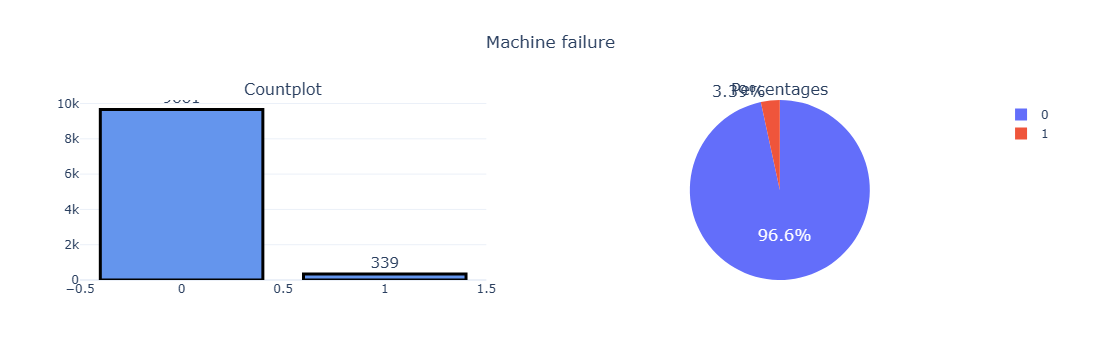

In [27]:
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['Machine failure'].value_counts().values.tolist(), 
                      x = df['Machine failure'].value_counts().index, 
                      text=df['Machine failure'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      name = 'Machine failure',
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'cornflowerblue',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['Machine failure'].value_counts().keys(),
                             values=df['Machine failure'].value_counts().values,textfont = dict(size = 16),
                     textposition='auto',
                     showlegend = True,
                     name = 'Machine failure')), row = 1, col = 2)
fig.update_layout(title={'text': 'Machine failure',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,10200])
iplot(fig)

#### In the given data 96.7% of Machine are not failure
#### only 3.3% Machine are failure

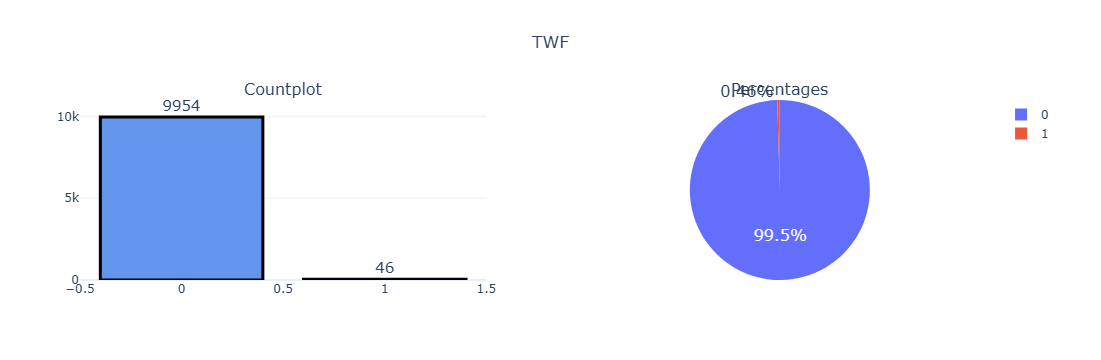

In [29]:
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['TWF'].value_counts().values.tolist(), 
                      x = df['TWF'].value_counts().index, 
                      text=df['TWF'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      name = 'TWF',
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'cornflowerblue',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['TWF'].value_counts().keys(),
                             values=df['TWF'].value_counts().values,textfont = dict(size = 16),
                     textposition='auto',
                     showlegend = True,
                     name = 'TWF')), row = 1, col = 2)
fig.update_layout(title={'text': 'TWF',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,11000])
iplot(fig)

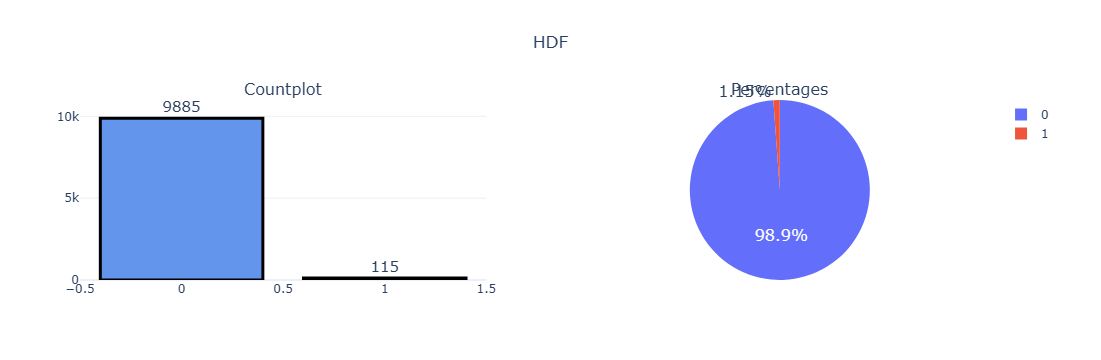

In [30]:
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['HDF'].value_counts().values.tolist(), 
                      x = df['HDF'].value_counts().index, 
                      text=df['HDF'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      name = 'HDF',
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'cornflowerblue',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['HDF'].value_counts().keys(),
                             values=df['HDF'].value_counts().values,textfont = dict(size = 16),
                     textposition='auto',
                     showlegend = True,
                     name = 'HDF')), row = 1, col = 2)
fig.update_layout(title={'text': 'HDF',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,11000])
iplot(fig)

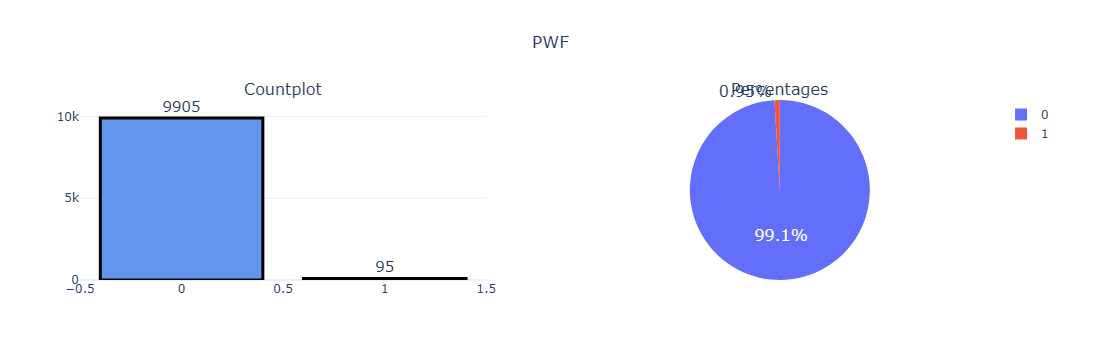

In [31]:
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['PWF'].value_counts().values.tolist(), 
                      x = df['PWF'].value_counts().index, 
                      text=df['PWF'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      name = 'PWF',
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'cornflowerblue',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['PWF'].value_counts().keys(),
                             values=df['PWF'].value_counts().values,textfont = dict(size = 16),
                     textposition='auto',
                     showlegend = True,
                     name = 'PWF')), row = 1, col = 2)
fig.update_layout(title={'text': 'PWF',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,11000])
iplot(fig)

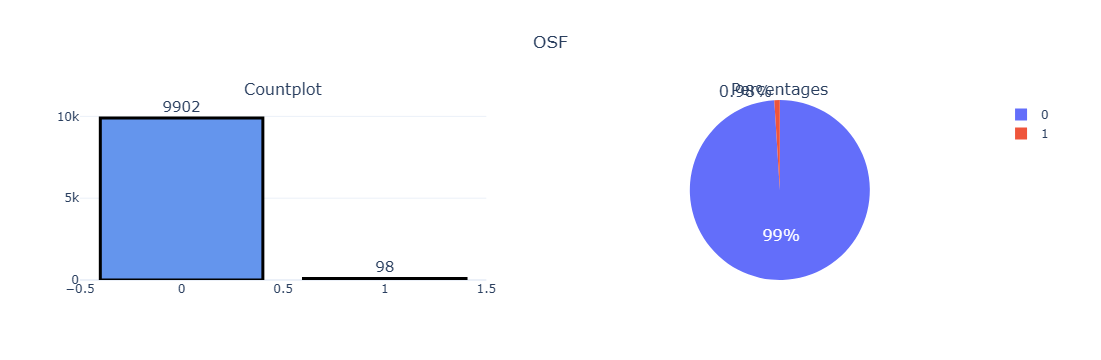

In [32]:
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['OSF'].value_counts().values.tolist(), 
                      x = df['OSF'].value_counts().index, 
                      text=df['OSF'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      name = 'OSF',
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'cornflowerblue',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['OSF'].value_counts().keys(),
                             values=df['OSF'].value_counts().values,textfont = dict(size = 16),
                     textposition='auto',
                     showlegend = True,
                     name = 'OSF')), row = 1, col = 2)
fig.update_layout(title={'text': 'OSF',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,11000])
iplot(fig)

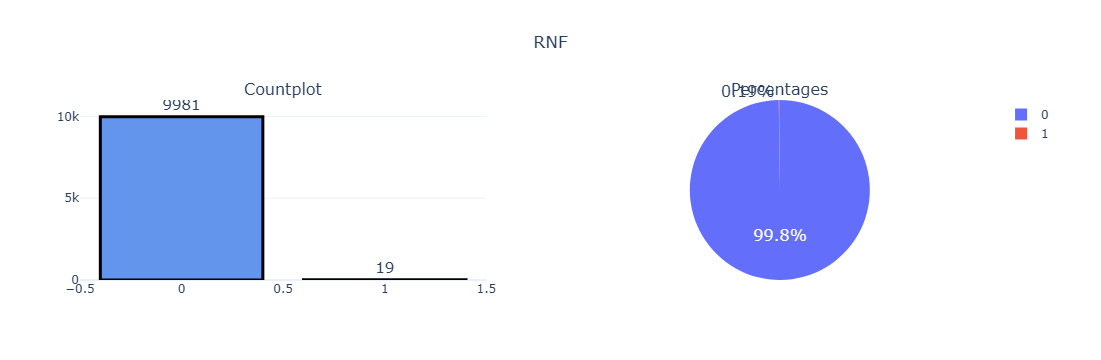

In [33]:
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['RNF'].value_counts().values.tolist(), 
                      x = df['RNF'].value_counts().index, 
                      text=df['RNF'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      name = 'RNF',
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'cornflowerblue',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['RNF'].value_counts().keys(),
                             values=df['RNF'].value_counts().values,textfont = dict(size = 16),
                     textposition='auto',
                     showlegend = True,
                     name = 'RNF')), row = 1, col = 2)
fig.update_layout(title={'text': 'RNF',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,11000])
iplot(fig)

## Pairplot

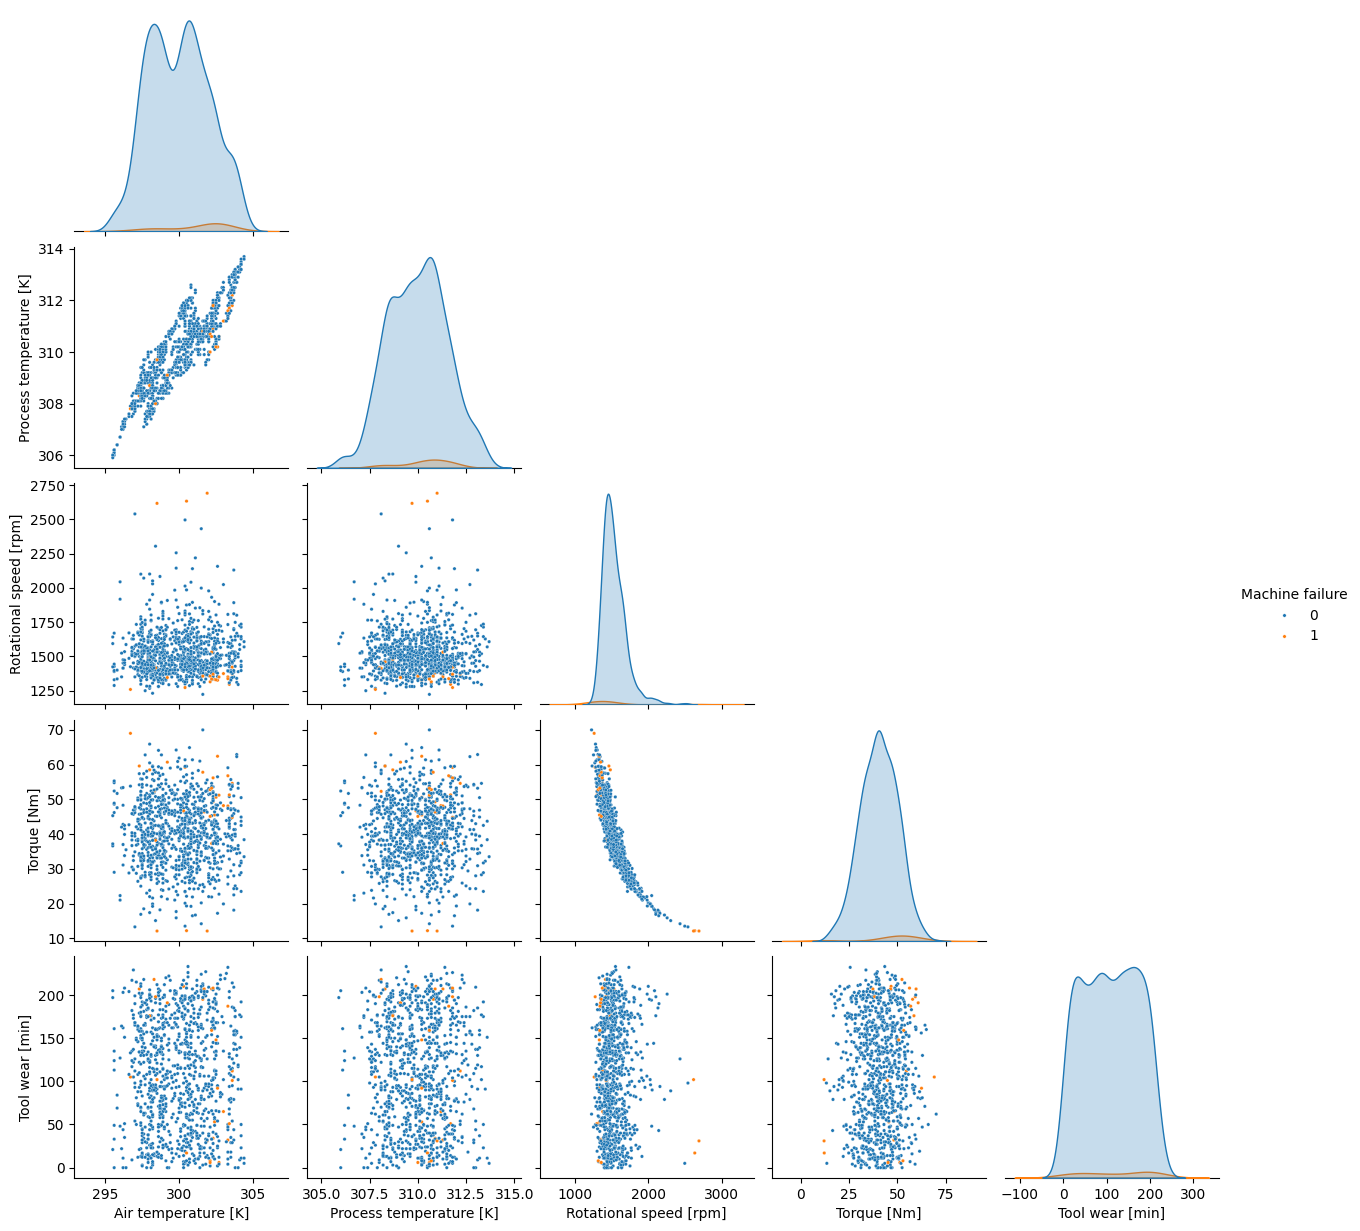

In [36]:
def plot_pair():
    sns.pairplot(data=df.drop(['UDI', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1).sample(1000).select_dtypes(include='number'),
                 hue='Machine failure',
                 plot_kws={'s':6},
                 corner=True)
    plt.show()

plot_pair()

>## Exploring numerical variables

In [38]:
train_num_visual_0 = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']

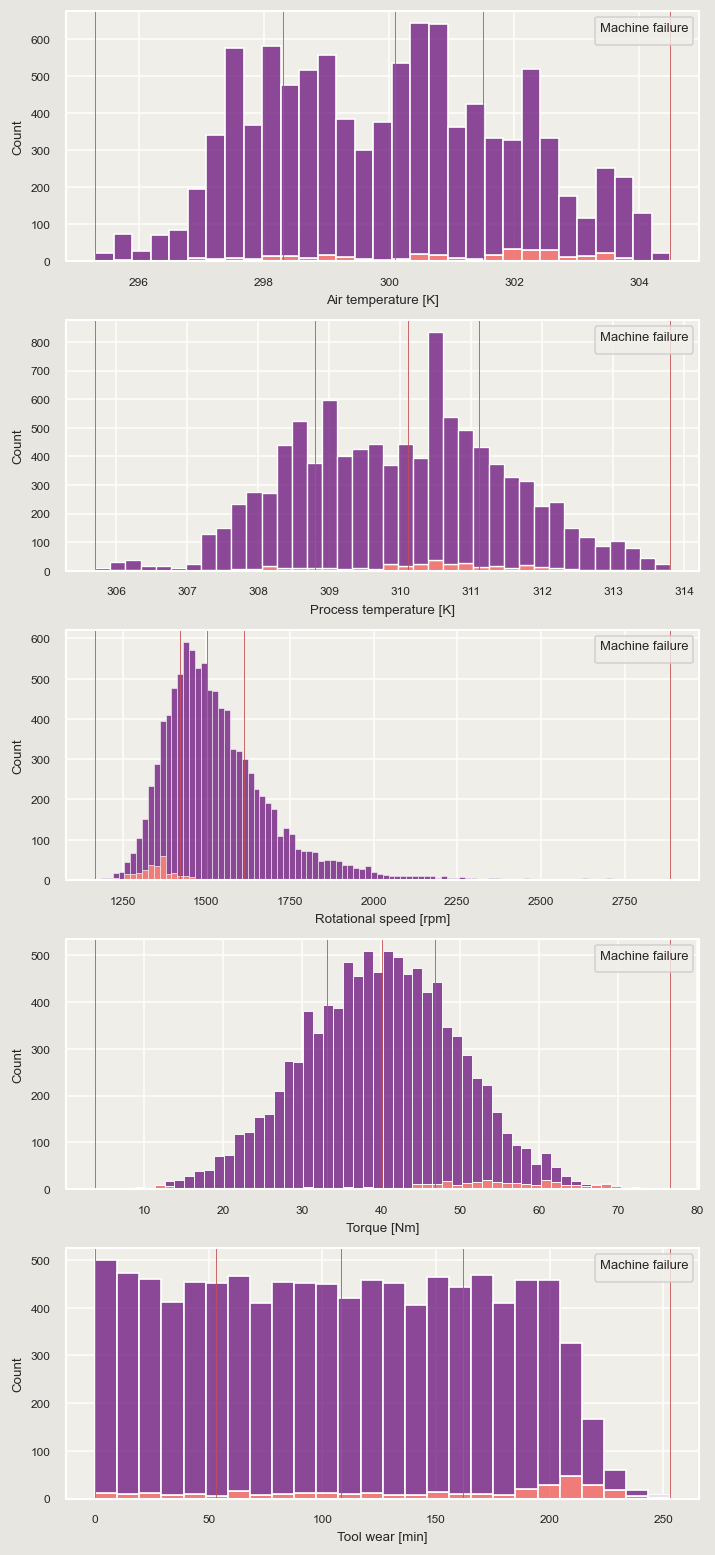

In [39]:

sns.set_theme(rc={'figure.dpi': 120, 'axes.labelsize': 8, 
                  'axes.facecolor': '#f0eee9', 'grid.color': '#fffdfa', 
                  'figure.facecolor': '#e8e6e1'}, font_scale=0.65)

fig, ax = plt.subplots(5, 1, figsize=(6, 13))

for indx, (column, axes) in enumerate(zip(train_num_visual_0, ax.flatten())):
    
    sns.histplot(ax=axes, x=df[column], hue=df['Machine failure'], 
                 palette='magma', alpha=0.8, multiple='stack')
    
    legend = axes.get_legend()  # sns.histplot has some issues with legend

    if legend:  # Ensure the legend exists before modifying
        handles, labels = axes.get_legend_handles_labels()  # The correct way
        legend.remove()
        axes.legend(handles, labels, title='Machine failure', loc='upper right')

    # Plot quantiles
    Quantiles = np.quantile(df[column], [0, 0.25, 0.50, 0.75, 1])
    
    for q in Quantiles:
        axes.axvline(x=q, linewidth=0.5, color='r')

plt.tight_layout()
plt.show()


# Analysis of Machine failure conditions using Features with histogram plot

In [41]:
df_MF = df[df['Machine failure'] == 1]
df_MF

# This data frame contains only rows with machine failure = 1

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
50      51     L47230    L                298.9                    309.1   
69      70     L47249    L                298.9                    309.0   
77      78     L47257    L                298.8                    308.9   
160    161     L47340    L                298.4                    308.2   
161    162     L47341    L                298.3                    308.1   
...    ...        ...  ...                  ...                      ...   
9758  9759     L56938    L                298.6                    309.8   
9764  9765     L56944    L                298.5                    309.5   
9822  9823     L57002    L                298.5                    309.4   
9830  9831     L57010    L                298.3                    309.3   
9974  9975     L57154    L                298.6                    308.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
50                      2861          4.6              143                1   
69                      1410         65.7              191                1   
77                      1455         41.3              208                1   
160                     1282         60.7              216                1   
161                     1412         52.3              218                1   
...                      ...          ...              ...              ...   
9758                    2271         16.2              218                1   
9764                    1294         66.7               12                1   
9822                    1360         60.9              187                1   
9830                    1337         56.1              206                1   
9974                    1361         68.2              172                1   

      TWF  HDF  PWF  OSF  RNF  
50      0    0    1    0    0  
69      0    0    1    1    0  
77      1    0    0    0    0  
160     0    0    0    1    0  
161     0    0    0    1    0  
...   ...  ...  ...  ...  ...  
9758    1    0    0    0    0  
9764    0    0    1    0    0  
9822    0    0    0    1    0  
9830    0    0    0    1    0  
9974    0    0    1    1    0  

[339 rows x 14 columns]

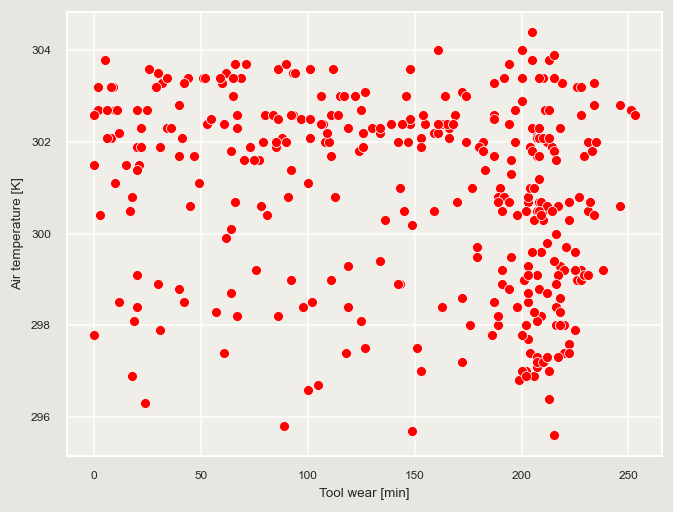

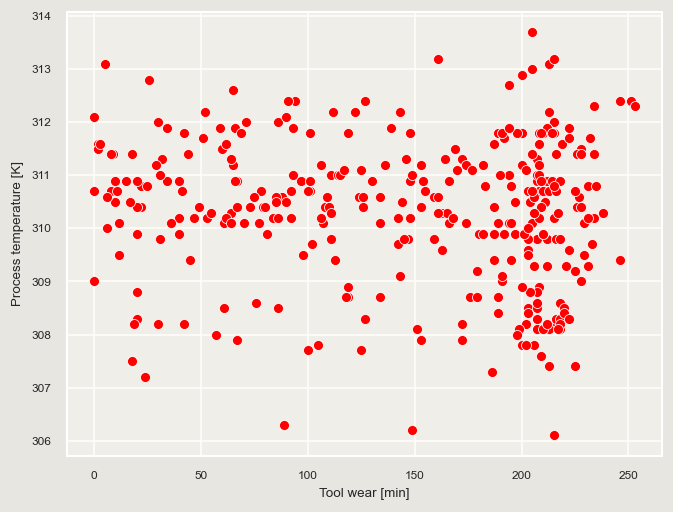

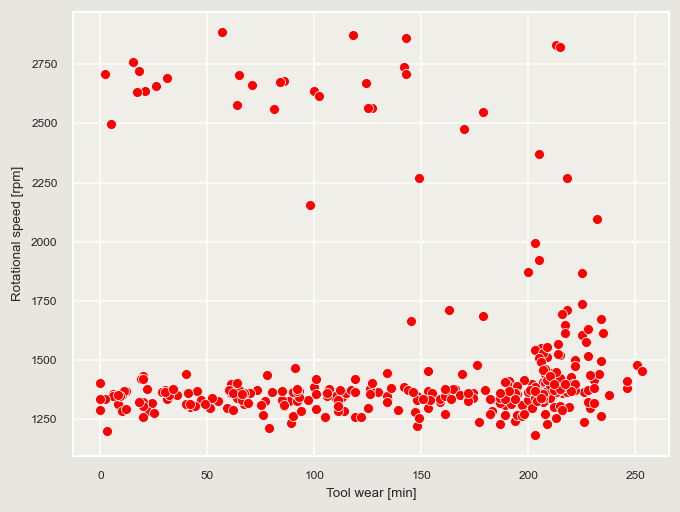

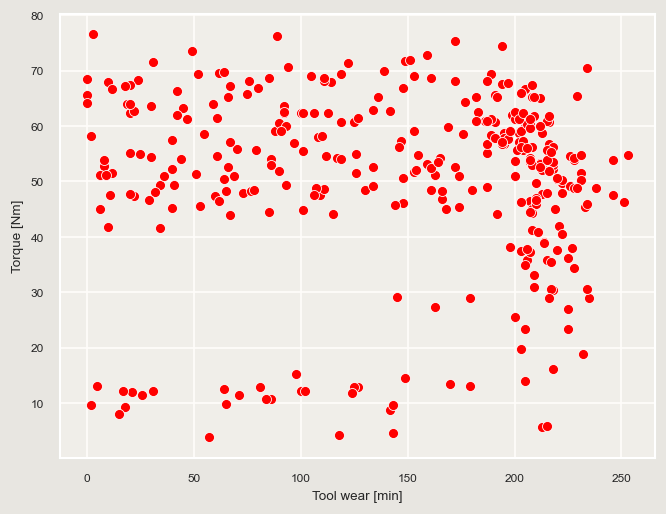

In [42]:
a = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]']
for i in a:
    sns.scatterplot(y=df_MF[i], x=df_MF["Tool wear [min]"],color = 'red')
    plt.show()

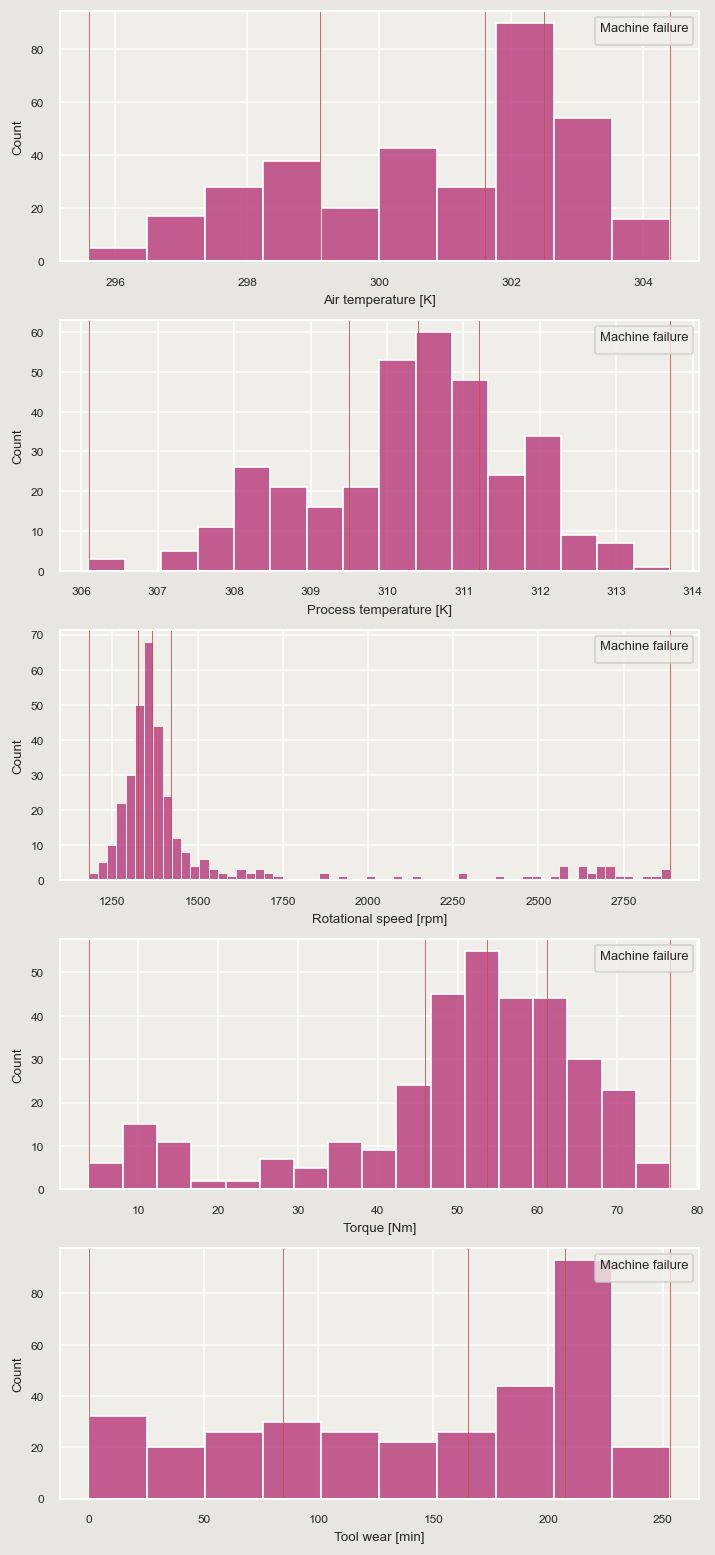

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(rc={'figure.dpi': 120, 'axes.labelsize': 8, 
                  'axes.facecolor': '#f0eee9', 'grid.color': '#fffdfa', 
                  'figure.facecolor': '#e8e6e1'}, font_scale=0.65)

fig, ax = plt.subplots(5, 1, figsize=(6, 13))

for indx, (column, axes) in enumerate(zip(train_num_visual_0, ax.flatten())):
    
    sns.histplot(ax=axes, x=df_MF[column], hue=df_MF['Machine failure'], 
                 palette='magma', alpha=0.8, multiple='stack')
    
    legend = axes.get_legend()  # sns.histplot has some issues with legend

    if legend:  # Ensure the legend exists before modifying
        handles, labels = axes.get_legend_handles_labels()  # Correct method
        legend.remove()
        axes.legend(handles, ['1'], title='Machine failure', loc='upper right')

    # Plot quantiles
    Quantiles = np.quantile(df_MF[column], [0, 0.25, 0.50, 0.75, 1])
    
    for q in Quantiles:
        axes.axvline(x=q, linewidth=0.5, color='r')

plt.tight_layout()
plt.show()


> # Basic Data Cleaning: Renaming some of the column names

In [45]:
df.rename(columns = {'Air temperature [K]':'Airtemp'}, inplace = True)
df.rename(columns={'Process temperature [K]':'Processtemp'} ,inplace=True)
df.rename(columns={'Rotational speed [rpm]':'Rotationalspeed'} ,inplace=True)
df.rename(columns={'Torque [Nm]':'Torque'} ,inplace=True)
df.rename(columns={'Tool wear [min]':'Toolwear'} ,inplace=True)

In [46]:
df.drop(['UDI'],axis = 1,inplace = True)
# This column is not useful in predictions

In [47]:
df.columns

Index(['Product ID', 'Type', 'Airtemp', 'Processtemp', 'Rotationalspeed',
       'Torque', 'Toolwear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

# Label Encoding  

In [49]:
def LABEL_ENCODING(c1):
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
    # Encode labels in column 'species'.
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()
    return df

In [50]:
LABEL_ENCODING('Type')

Product ID  Type  Airtemp  Processtemp  Rotationalspeed  Torque  \
0        M14860     2    298.1        308.6             1551    42.8   
1        L47181     1    298.2        308.7             1408    46.3   
2        L47182     1    298.1        308.5             1498    49.4   
3        L47183     1    298.2        308.6             1433    39.5   
4        L47184     1    298.2        308.7             1408    40.0   
...         ...   ...      ...          ...              ...     ...   
9995     M24855     2    298.8        308.4             1604    29.5   
9996     H39410     0    298.9        308.4             1632    31.8   
9997     M24857     2    299.0        308.6             1645    33.4   
9998     H39412     0    299.0        308.7             1408    48.5   
9999     M24859     2    299.0        308.7             1500    40.2   

      Toolwear  Machine failure  TWF  HDF  PWF  OSF  RNF  
0            0                0    0    0    0    0    0  
1            3                0    0    0    0    0    0  
2            5                0    0    0    0    0    0  
3            7                0    0    0    0    0    0  
4            9                0    0    0    0    0    0  
...        ...              ...  ...  ...  ...  ...  ...  
9995        14                0    0    0    0    0    0  
9996        17                0    0    0    0    0    0  
9997        22                0    0    0    0    0    0  
9998        25                0    0    0    0    0    0  
9999        30                0    0    0    0    0    0  

[10000 rows x 13 columns]

# Sampling

In [52]:
import imblearn
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [53]:
df1=df[["Airtemp","Processtemp","Rotationalspeed","Torque","Toolwear","Machine failure"]]
print(df1)

      Airtemp  Processtemp  Rotationalspeed  Torque  Toolwear  Machine failure
0       298.1        308.6             1551    42.8         0                0
1       298.2        308.7             1408    46.3         3                0
2       298.1        308.5             1498    49.4         5                0
3       298.2        308.6             1433    39.5         7                0
4       298.2        308.7             1408    40.0         9                0
...       ...          ...              ...     ...       ...              ...
9995    298.8        308.4             1604    29.5        14                0
9996    298.9        308.4             1632    31.8        17                0
9997    299.0        308.6             1645    33.4        22                0
9998    299.0        308.7             1408    48.5        25                0
9999    299.0        308.7             1500    40.2        30                0

[10000 rows x 6 columns]


In [54]:
X=df1.iloc[:, :-1].values
print(X)
y=df1.iloc[: ,5].values
print(y)

[[ 298.1  308.6 1551.    42.8    0. ]
 [ 298.2  308.7 1408.    46.3    3. ]
 [ 298.1  308.5 1498.    49.4    5. ]
 ...
 [ 299.   308.6 1645.    33.4   22. ]
 [ 299.   308.7 1408.    48.5   25. ]
 [ 299.   308.7 1500.    40.2   30. ]]
[0 0 0 ... 0 0 0]


In [55]:
algo_name = []
train_accuracy = []
test_accuracy = []
validation_accuracy = []
test_recall = []
test_precision = []
test_f1score = []

# Splitting the data without using SMOTE

In [57]:
scalar = StandardScaler()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train1, X_validate1, y_train1, y_validate1 = train_test_split(X_train1, y_train1, 
                                                            test_size=0.2, random_state=42)

X_train1 = scalar.fit_transform(X_train1)
X_validate1 = scalar.transform(X_validate1)
X_test1 = scalar.transform(X_test1)
print(f"TRAINING: X_train: {X_train1.shape}, y_train: {y_train1.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate1.shape}, y_validate: {y_validate1.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test1.shape}, y_test: {y_test1.shape}")

TRAINING: X_train: (5600, 5), y_train: (5600,)
_______________________________________________________
VALIDATION: X_validate: (1400, 5), y_validate: (1400,)
__________________________________________________
TESTING: X_test: (3000, 5), y_test: (3000,)


# Finding K value for the SMOTE

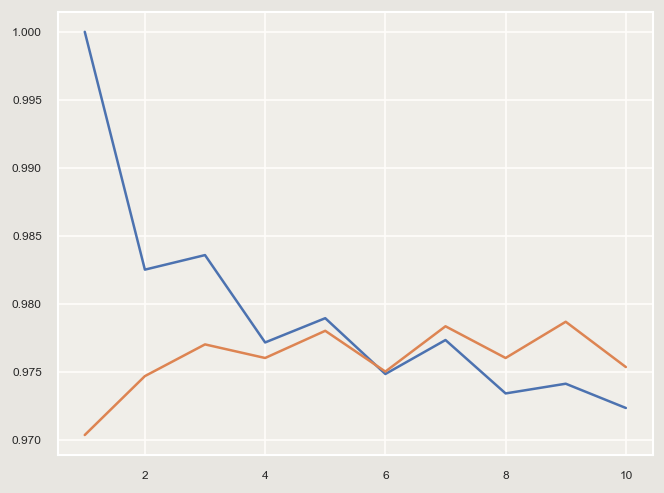

In [59]:
from sklearn.neighbors import KNeighborsClassifier
trainacc=[]
testacc=[]
neighbors=range(1,11)
for i in neighbors:
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train1,y_train1)
    trainacc.append(KNN.score(X_train1,y_train1))
    testacc.append(KNN.score(X_test1,y_test1))
    
plt.plot(neighbors,trainacc,label="trainacc")
plt.plot(neighbors,testacc,label="testacc")

# SMOTE Sampling 

In [61]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, 
                                                            test_size=0.2, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
print("Number transactions X_validate dataset: ", X_validate.shape)
print("Number transactions y_validate dataset: ", y_validate.shape)

Number transactions X_train dataset:  (5600, 5)
Number transactions y_train dataset:  (5600,)
Number transactions X_test dataset:  (3000, 5)
Number transactions y_test dataset:  (3000,)
Number transactions X_validate dataset:  (1400, 5)
Number transactions y_validate dataset:  (1400,)


Before OverSampling, counts of label '1': 206
Before OverSampling, counts of label '0': 5394 

Counter({0: 5394, 1: 206})


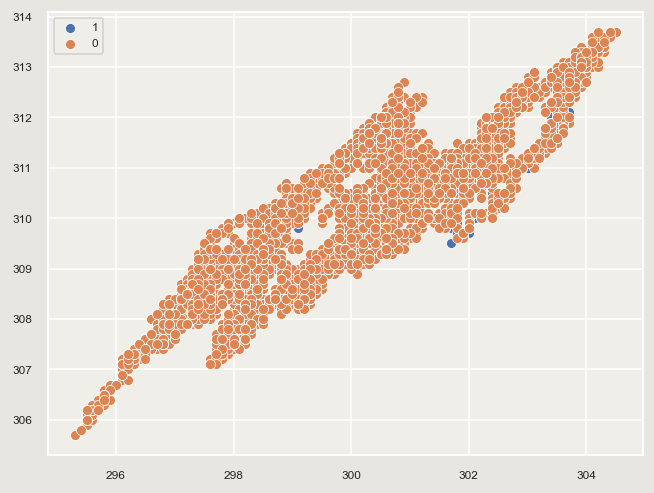

Counter({0: 5394, 1: 2697})


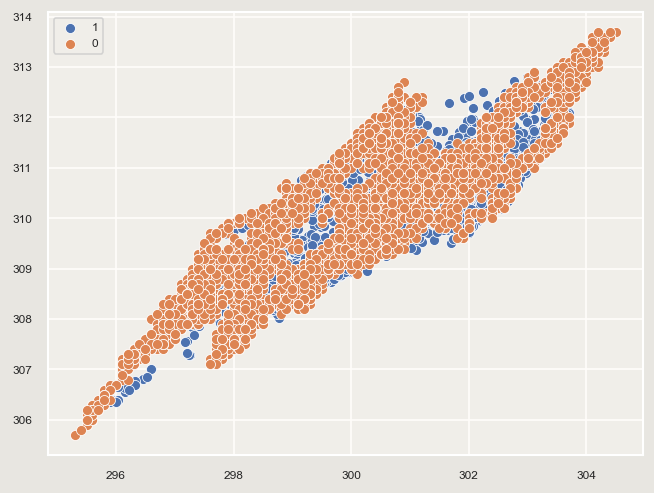

After OverSampling, the shape of train_X: (8091, 5)
After OverSampling, the shape of train_y: (8091,) 

After OverSampling, counts of label '1': 2697
After OverSampling, counts of label '0': 5394


In [67]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Ensure SMOTE is imported

# Check class distribution before oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

counter = Counter(y_train)
print(counter)

# Scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y_train == label)[0]  # Fixed y_train1 -> y_train
    sns.scatterplot(x=X_train[row_ix, 0], y=X_train[row_ix, 1], label=str(label))  # Fixed scatterplot syntax
plt.legend()
plt.show()

# Apply SMOTE for oversampling
sm = SMOTE(random_state=1, sampling_strategy=0.5, k_neighbors=6)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Check class distribution after oversampling
counter = Counter(y_train_res)
print(counter)

# Scatter plot after resampling
for label, _ in counter.items():
    row_ix = np.where(y_train_res == label)[0]
    sns.scatterplot(x=X_train_res[row_ix, 0], y=X_train_res[row_ix, 1], label=str(label))  # Fixed scatterplot syntax
plt.legend()
plt.show()

# Display shape of the resampled dataset
print('After OverSampling, the shape of train_X:', X_train_res.shape)
print('After OverSampling, the shape of train_y:', y_train_res.shape, "\n")

print("After OverSampling, counts of label '1':", sum(y_train_res == 1))
print("After OverSampling, counts of label '0':", sum(y_train_res == 0))


# Random Forest 

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    5400.0  200.0       1.0     5600.0        5600.0
_______________________________________________
Confusion Matrix: 
 [[5400    0]
 [   0  200]]

Test Result:
Accuracy Score: 98.40%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.987053   0.846154     0.984     0.916603      0.982685
recall        0.996560   0.591398     0.984     0.793979      0.984000
f1-score      0.991784   0.696203     0.984     0.843993      0.982621
support    2907.000000  93.000000     0.984  3000.000000   3000.000000
_________________________________

<Axes: >

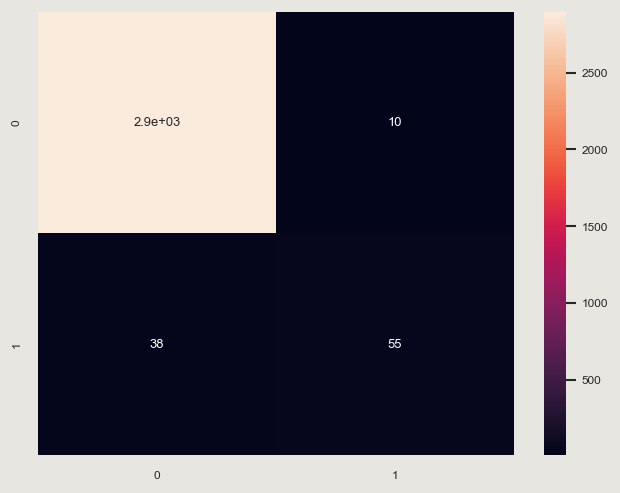

In [70]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators =80, random_state = 0)
forest.fit(X_train1,y_train1)  
y_test_pred1 = forest.predict(X_test1)
y_validate_pred1 = forest.predict(X_validate1)
y_train_pred1 = forest.predict(X_train1)
def print_score(label, prediction, x):
    if x == "train":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        train_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train1, prediction)}\n")
        test_recall.append(f"{recall_score(y_test1, y_test_pred1) * 100:.3f}%")
        test_precision.append(f"{precision_score(y_test1, y_test_pred1) * 100:.3f}%")
        test_f1score.append(f"{f1_score(y_test1, y_test_pred1) * 100:.3f}%")
        
    elif x == "test":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        test_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
    elif x == "validate":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("validation Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        validation_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
algo_name.append('Random Forest Classifier')
print_score(y_train1, y_train_pred1.round(), "train")
print_score(y_test1, y_test_pred1.round(), "test")
print_score(y_validate1, y_validate_pred1.round(), "validate")
sns.heatmap(confusion_matrix(y_test1, y_test_pred1.round()), annot=True)

# Random Forest with SMOTE

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    5394.0  2697.0       1.0     8091.0        8091.0
_______________________________________________
Confusion Matrix: 
 [[5394    0]
 [   0 2697]]

Test Result:
Accuracy Score: 96.17%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.990839   0.450617  0.961667     0.720728      0.973011
recall        0.969321   0.737374  0.961667     0.853347      0.961667
f1-score      0.979962   0.559387  0.961667     0.769674      0.966083
support    2901.000000  99.000000  0.961667  3000.000000   3000.000000
____________________________

<Axes: >

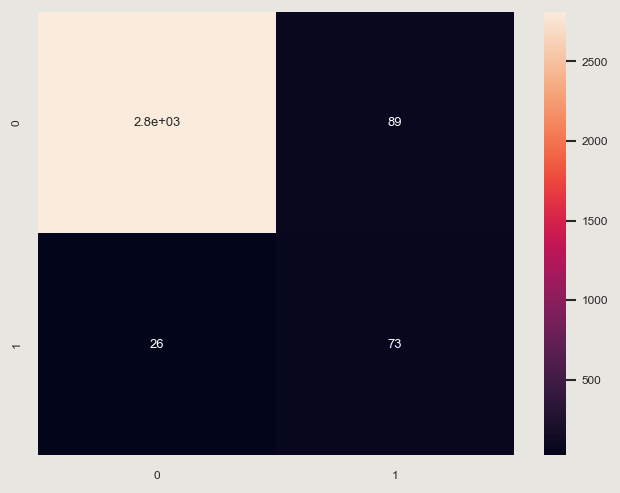

In [73]:
from sklearn.ensemble import RandomForestClassifier
forestSM= RandomForestClassifier(n_estimators =80, random_state = 0)
forestSM.fit(X_train_res,y_train_res)  
y_test_pred2 = forestSM.predict(X_test)
y_validate_pred2 = forestSM.predict(X_validate)
y_train_pred2 = forestSM.predict(X_train_res)
def print_score(label, prediction, x):
    if x == "train":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        train_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_res, prediction)}\n")
        test_recall.append(f"{recall_score(y_test, y_test_pred2) * 100:.3f}%")
        test_precision.append(f"{precision_score(y_test, y_test_pred2) * 100:.3f}%")
        test_f1score.append(f"{f1_score(y_test, y_test_pred2) * 100:.3f}%")
    elif x == "test":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        test_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
    elif x == "validate":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("validation Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        validation_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
algo_name.append('Random Forest Classifier with SMOTE')
print_score(y_train_res, y_train_pred2.round(), "train")
print_score(y_test, y_test_pred2.round(), "test")
print_score(y_validate, y_validate_pred2.round(), "validate")
cn = confusion_matrix(y_test, y_test_pred2.round())
print(cn)
sns.heatmap(cn, annot=True)

# LogisticRgression without SMOTE

Train Result:
Accuracy Score: 96.95%
_______________________________________________
Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.972017    0.737705  0.969464     0.854861      0.963648
recall        0.997037    0.225000  0.969464     0.611019      0.969464
f1-score      0.984368    0.344828  0.969464     0.664598      0.961527
support    5400.000000  200.000000  0.969464  5600.000000   5600.000000
_______________________________________________
Confusion Matrix: 
 [[5384   16]
 [ 155   45]]

Test Result:
Accuracy Score: 97.37%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.976415   0.718750  0.973667     0.847583      0.968427
recall        0.996904   0.247312  0.973667     0.622108      0.973667
f1-score      0.986553   0.368000  0.973667     0.677277      0.967378
support    2907.000000  93.000000  0.973667  

<Axes: >

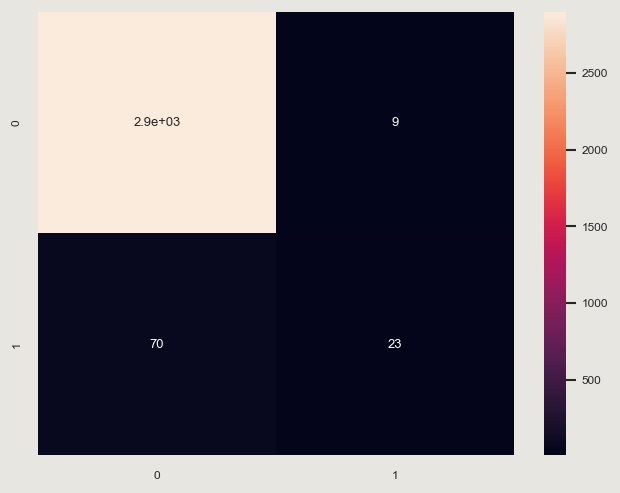

In [76]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train1,y_train1)
y_test_pred3 = logmodel.predict(X_test1)
y_validate_pred3 = logmodel.predict(X_validate1)
y_train_pred3 = logmodel.predict(X_train1)
def print_score(label, prediction, x):
    if x == "train":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        train_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train1, prediction)}\n")
        test_recall.append(f"{recall_score(y_test1, y_test_pred3) * 100:.3f}%")
        test_precision.append(f"{precision_score(y_test1, y_test_pred3) * 100:.3f}%")
        test_f1score.append(f"{f1_score(y_test1, y_test_pred3) * 100:.3f}%")
    elif x == "test":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        test_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
    elif x == "validate":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("validation Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        validation_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
algo_name.append('Logistic Regression')
print_score(y_train1, y_train_pred3.round(), "train")
print_score(y_test1, y_test_pred3.round(), "test")
print_score(y_validate1, y_validate_pred3.round(), "validate")
sns.heatmap(confusion_matrix(y_test1, y_test_pred3.round()), annot=True)

# LogisticRgression with SMOTE

Train Result:
Accuracy Score: 84.93%
_______________________________________________
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.873502     0.795364  0.849339     0.834433      0.847456
recall        0.905080     0.737857  0.849339     0.821468      0.849339
f1-score      0.889010     0.765532  0.849339     0.827271      0.847851
support    5394.000000  2697.000000  0.849339  8091.000000   8091.000000
_______________________________________________
Confusion Matrix: 
 [[4882  512]
 [ 707 1990]]

Test Result:
Accuracy Score: 89.33%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.987902   0.188732  0.893333     0.588317      0.961529
recall        0.900724   0.676768  0.893333     0.788746      0.893333
f1-score      0.942301   0.295154  0.893333     0.618727      0.920945
support    2901.000000  99.000000  0.893

<Axes: >

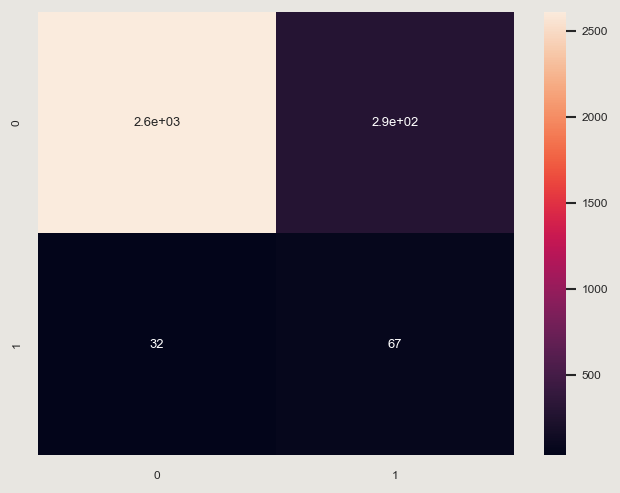

In [79]:
from sklearn.linear_model import LogisticRegression
logmodelSM = LogisticRegression()
logmodelSM.fit(X_train_res,y_train_res)
y_test_pred4 = logmodelSM.predict(X_test)
y_validate_pred4 = logmodelSM.predict(X_validate)
y_train_pred4 = logmodelSM.predict(X_train_res)
def print_score(label, prediction, x):
    if x == "train":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        train_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_res, prediction)}\n")
        test_recall.append(f"{recall_score(y_test, y_test_pred4) * 100:.3f}%")
        test_precision.append(f"{precision_score(y_test, y_test_pred4) * 100:.3f}%")
        test_f1score.append(f"{f1_score(y_test, y_test_pred4) * 100:.3f}%")
    elif x == "test":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        test_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
    elif x == "validate":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("validation Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        validation_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
algo_name.append('Logistic Regression with SMOTE')
print_score(y_train_res, y_train_pred4.round(), "train")
print_score(y_test, y_test_pred4.round(), "test")
print_score(y_validate, y_validate_pred4.round(), "validate")
sns.heatmap(confusion_matrix(y_test, y_test_pred4.round()), annot=True)

# DecisionTree without SMOTE

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    5400.0  200.0       1.0     5600.0        5600.0
_______________________________________________
Confusion Matrix: 
 [[5400    0]
 [   0  200]]

Test Result:
Accuracy Score: 97.73%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.987633   0.640449  0.977333     0.814041      0.976870
recall        0.988992   0.612903  0.977333     0.800948      0.977333
f1-score      0.988312   0.626374  0.977333     0.807343      0.977092
support    2907.000000  93.000000  0.977333  3000.000000   3000.000000
_________________________________

<Axes: >

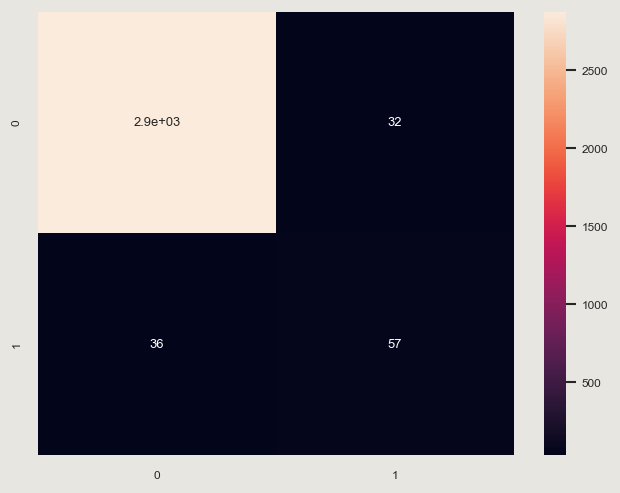

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train1, y_train1)
y_test_pred5 = dtc.predict(X_test1)
y_validate_pred5 = dtc.predict(X_validate1)
y_train_pred5 = dtc.predict(X_train1)
def print_score(label, prediction, x):
    if x == "train":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        train_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train1, prediction)}\n")
        test_recall.append(f"{recall_score(y_test1, y_test_pred5) * 100:.3f}%")
        test_precision.append(f"{precision_score(y_test1, y_test_pred5) * 100:.3f}%")
        test_f1score.append(f"{f1_score(y_test1, y_test_pred5) * 100:.3f}%")
    elif x == "test":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        test_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
    elif x == "validate":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("validation Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        validation_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
algo_name.append('Decision Tree')
print_score(y_train1, y_train_pred5.round(), "train")
print_score(y_test1, y_test_pred5.round(), "test")
print_score(y_validate1, y_validate_pred5.round(), "validate")
sns.heatmap(confusion_matrix(y_test1, y_test_pred5.round()), annot=True)

# DecisionTree with SMOTE

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    5394.0  2697.0       1.0     8091.0        8091.0
_______________________________________________
Confusion Matrix: 
 [[5394    0]
 [   0 2697]]

Test Result:
Accuracy Score: 95.53%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.988697   0.396450  0.955333     0.692573      0.969152
recall        0.964840   0.676768  0.955333     0.820804      0.955333
f1-score      0.976622   0.500000  0.955333     0.738311      0.960894
support    2901.000000  99.000000  0.955333  3000.000000   3000.000000
____________________________

<Axes: >

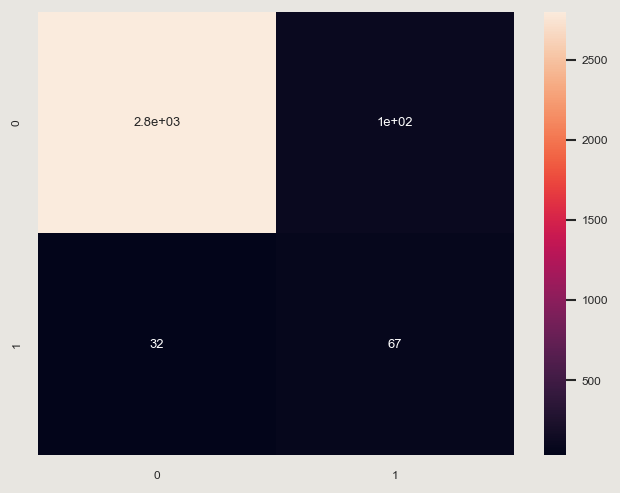

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtcSM = DecisionTreeClassifier()
dtcSM.fit(X_train_res, y_train_res)
y_test_pred6 = dtcSM.predict(X_test)
y_validate_pred6 = dtcSM.predict(X_validate)
y_train_pred6 = dtcSM.predict(X_train_res)
def print_score(label, prediction, x):
    if x == "train":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        train_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_res, prediction)}\n")
        test_recall.append(f"{recall_score(y_test, y_test_pred6) * 100:.3f}%")
        test_precision.append(f"{precision_score(y_test, y_test_pred6) * 100:.3f}%")
        test_f1score.append(f"{f1_score(y_test, y_test_pred6) * 100:.3f}%")
    elif x == "test":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        test_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
    elif x == "validate":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("validation Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        validation_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
algo_name.append('Decision Tree with SMOTE')
print_score(y_train_res, y_train_pred6.round(), "train")
print_score(y_test, y_test_pred6.round(), "test")
print_score(y_validate, y_validate_pred6.round(), "validate")
sns.heatmap(confusion_matrix(y_test, y_test_pred6.round()), annot=True)

# SVM without SMOTE

Train Result:
Accuracy Score: 97.34%
_______________________________________________
Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.974174    0.904762  0.973393     0.939468      0.971695
recall        0.998889    0.285000  0.973393     0.641944      0.973393
f1-score      0.986377    0.433460  0.973393     0.709918      0.966630
support    5400.000000  200.000000  0.973393  5600.000000   5600.000000
_______________________________________________
Confusion Matrix: 
 [[5394    6]
 [ 143   57]]

Test Result:
Accuracy Score: 97.70%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.977456   0.928571     0.977     0.953014      0.975941
recall        0.999312   0.279570     0.977     0.639441      0.977000
f1-score      0.988263   0.429752     0.977     0.709008      0.970949
support    2907.000000  93.000000     0.977  

<Axes: >

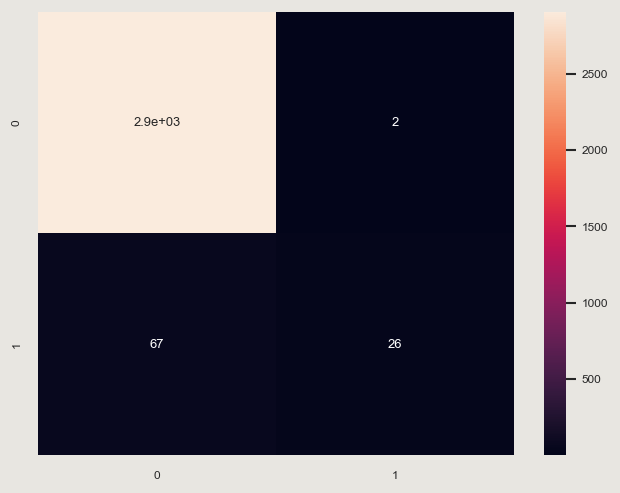

In [88]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train1, y_train1)
y_test_pred7 = svc.predict(X_test1)
y_validate_pred7 = svc.predict(X_validate1)
y_train_pred7 = svc.predict(X_train1)
def print_score(label, prediction, x):
    if x == "train":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        train_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train1, prediction)}\n")
        test_recall.append(f"{recall_score(y_test1, y_test_pred7) * 100:.3f}%")
        test_precision.append(f"{precision_score(y_test1, y_test_pred7) * 100:.3f}%")
        test_f1score.append(f"{f1_score(y_test1, y_test_pred7) * 100:.3f}%")
    elif x == "test":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        test_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
    elif x == "validate":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("validation Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        validation_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
algo_name.append('Support Vector Machine')
print_score(y_train1, y_train_pred7.round(), "train")
print_score(y_test1, y_test_pred7.round(), "test")
print_score(y_validate1, y_validate_pred7.round(), "validate")
sns.heatmap(confusion_matrix(y_test1, y_test_pred7.round()), annot=True)

# SVM with SMOTE

Train Result:
Accuracy Score: 82.76%
_______________________________________________
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.865205     0.748853  0.827586     0.807029      0.826421
recall        0.878198     0.726363  0.827586     0.802280      0.827586
f1-score      0.871653     0.737436  0.827586     0.804545      0.826914
support    5394.000000  2697.000000  0.827586  8091.000000   8091.000000
_______________________________________________
Confusion Matrix: 
 [[4737  657]
 [ 738 1959]]

Test Result:
Accuracy Score: 86.33%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.989391   0.158242  0.863333     0.573816      0.961963
recall        0.867977   0.727273  0.863333     0.797625      0.863333
f1-score      0.924715   0.259928  0.863333     0.592322      0.902777
support    2901.000000  99.000000  0.863

<Axes: >

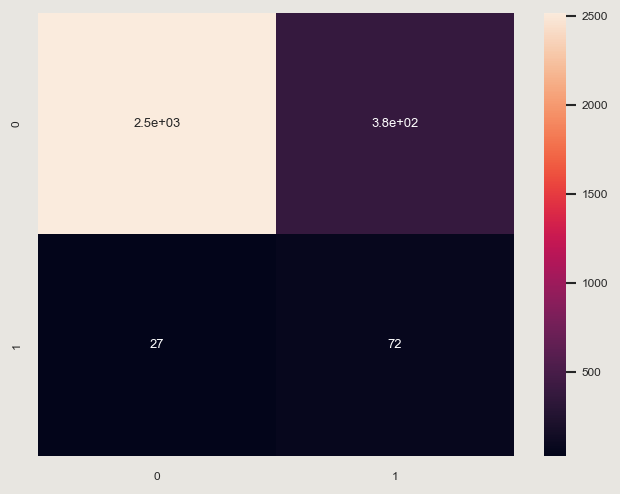

In [90]:
from sklearn.svm import SVC
svcSM = SVC()
svcSM.fit(X_train_res, y_train_res)
y_test_pred8 = svcSM.predict(X_test)
y_validate_pred8 = svcSM.predict(X_validate)
y_train_pred8 = svcSM.predict(X_train_res)
def print_score(label, prediction, x):
    if x == "train":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        train_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_res, prediction)}\n")
        test_recall.append(f"{recall_score(y_test, y_test_pred8) * 100:.3f}%")
        test_precision.append(f"{precision_score(y_test, y_test_pred8) * 100:.3f}%")
        test_f1score.append(f"{f1_score(y_test, y_test_pred8) * 100:.3f}%")
    elif x == "test":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        test_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
    elif x == "validate":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("validation Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        validation_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
algo_name.append('Support Vector Machine with SMOTE')
print_score(y_train_res, y_train_pred8.round(), "train")
print_score(y_test, y_test_pred8.round(), "test")
print_score(y_validate, y_validate_pred8.round(), "validate")
sns.heatmap(confusion_matrix(y_test, y_test_pred8.round()), annot=True)

# Naïve Bayes Classifier without SMOTE

Train Result:
Accuracy Score: 95.73%
_______________________________________________
Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.971324    0.344000  0.957321     0.657662      0.948920
recall        0.984815    0.215000  0.957321     0.599907      0.957321
f1-score      0.978023    0.264615  0.957321     0.621319      0.952544
support    5400.000000  200.000000  0.957321  5600.000000   5600.000000
_______________________________________________
Confusion Matrix: 
 [[5318   82]
 [ 157   43]]

Test Result:
Accuracy Score: 96.30%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.974864   0.339286     0.963     0.657075      0.955161
recall        0.987272   0.204301     0.963     0.595787      0.963000
f1-score      0.981029   0.255034     0.963     0.618031      0.958523
support    2907.000000  93.000000     0.963  

<Axes: >

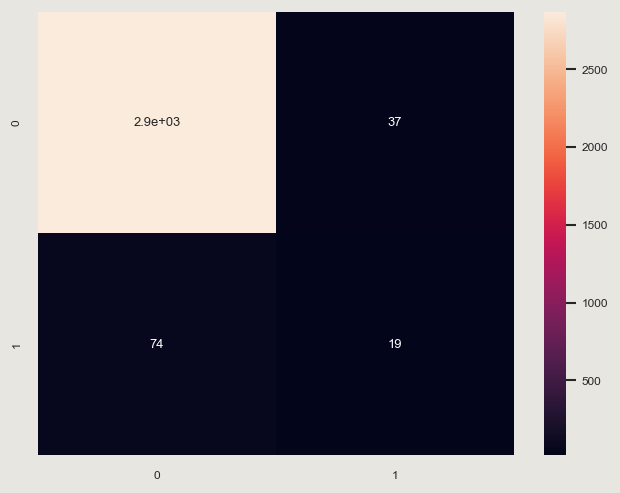

In [93]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train1, y_train1)
y_test_pred9 = classifier.predict(X_test1)
y_validate_pred9 = classifier.predict(X_validate1)
y_train_pred9 = classifier.predict(X_train1)
def print_score(label, prediction, x):
    if x == "train":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        train_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train1, prediction)}\n")
        test_recall.append(f"{recall_score(y_test1, y_test_pred9) * 100:.3f}%")
        test_precision.append(f"{precision_score(y_test1, y_test_pred9) * 100:.3f}%")
        test_f1score.append(f"{f1_score(y_test1, y_test_pred9) * 100:.3f}%")
    elif x == "test":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        test_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
    elif x == "validate":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("validation Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        validation_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
algo_name.append('Naive Bayes Classifier')
print_score(y_train1, y_train_pred9.round(), "train")
print_score(y_test1, y_test_pred9.round(), "test")
print_score(y_validate1, y_validate_pred9.round(), "validate")
sns.heatmap(confusion_matrix(y_test1, y_test_pred9.round()), annot=True)

# Naïve Bayes Classifier with SMOTE

Train Result:
Accuracy Score: 83.20%
_______________________________________________
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.842355     0.804368  0.832036     0.823361      0.829693
recall        0.920282     0.655543  0.832036     0.787912      0.832036
f1-score      0.879596     0.722370  0.832036     0.800983      0.827187
support    5394.000000  2697.000000  0.832036  8091.000000   8091.000000
_______________________________________________
Confusion Matrix: 
 [[4964  430]
 [ 929 1768]]

Test Result:
Accuracy Score: 91.03%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.988493   0.222222  0.910333     0.605358      0.963206
recall        0.917959   0.686869  0.910333     0.802414      0.910333
f1-score      0.951921   0.335802  0.910333     0.643862      0.931589
support    2901.000000  99.000000  0.910

<Axes: >

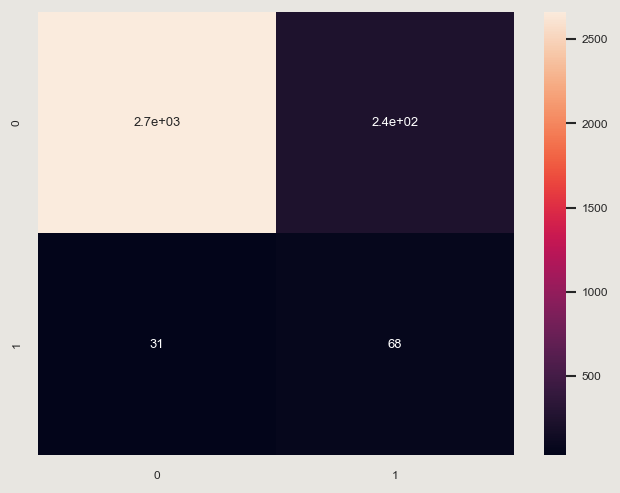

In [95]:
from sklearn.naive_bayes import GaussianNB  
classifierSM = GaussianNB()  
classifierSM.fit(X_train_res, y_train_res)
y_test_pred10 = classifierSM.predict(X_test)
y_validate_pred10 = classifierSM.predict(X_validate)
y_train_pred10 = classifierSM.predict(X_train_res)
def print_score(label, prediction, x):
    if x == "train":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        train_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_res, prediction)}\n")
        test_recall.append(f"{recall_score(y_test, y_test_pred10) * 100:.3f}%")
        test_precision.append(f"{precision_score(y_test, y_test_pred10) * 100:.3f}%")
        test_f1score.append(f"{f1_score(y_test, y_test_pred10) * 100:.3f}%")
    elif x == "test":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        test_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
    elif x == "validate":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("validation Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        validation_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
algo_name.append('Naive Bayes Classifier with SMOTE')
print_score(y_train_res, y_train_pred10.round(), "train")
print_score(y_test, y_test_pred10.round(), "test")
print_score(y_validate, y_validate_pred10.round(), "validate")
sns.heatmap(confusion_matrix(y_test, y_test_pred10.round()), annot=True)

# XGBoost without SMOTE

Train Result:
Accuracy Score: 96.86%
_______________________________________________
Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.968772    0.928571  0.968571     0.948672      0.967337
recall        0.999630    0.130000  0.968571     0.564815      0.968571
f1-score      0.983959    0.228070  0.968571     0.606015      0.956963
support    5400.000000  200.000000  0.968571  5600.000000   5600.000000
_______________________________________________
Confusion Matrix: 
 [[5398    2]
 [ 174   26]]

Test Result:
Accuracy Score: 97.33%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.973534   0.933333  0.973333     0.953434      0.972288
recall        0.999656   0.150538  0.973333     0.575097      0.973333
f1-score      0.986422   0.259259  0.973333     0.622841      0.963880
support    2907.000000  93.000000  0.973333  

<Axes: >

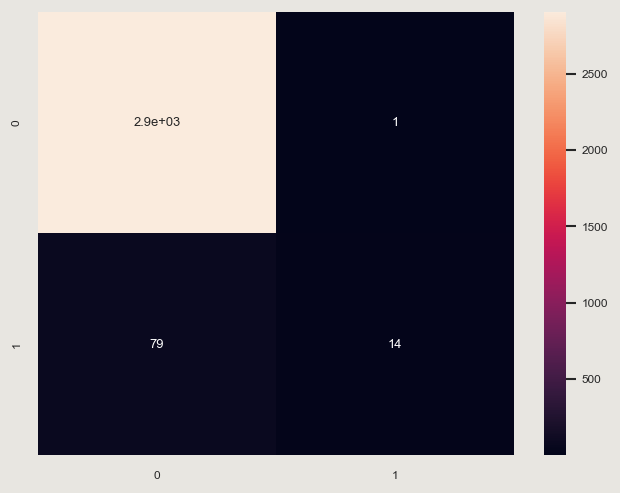

In [97]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, n_estimators = 10)
xgb.fit(X_train1, y_train1)
y_test_pred11 = xgb.predict(X_test1)
y_validate_pred11 = xgb.predict(X_validate1)
y_train_pred11 = xgb.predict(X_train1)
def print_score(label, prediction, x):
    if x == "train":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        train_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train1, prediction)}\n")
        test_recall.append(f"{recall_score(y_test1, y_test_pred11) * 100:.3f}%")
        test_precision.append(f"{precision_score(y_test1, y_test_pred11) * 100:.3f}%")
        test_f1score.append(f"{f1_score(y_test1, y_test_pred11) * 100:.3f}%")
    elif x == "test":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        test_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
    elif x == "validate":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("validation Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        validation_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
algo_name.append('XG Boosting')
print_score(y_train1, y_train_pred11.round(), "train")
print_score(y_test1, y_test_pred11.round(), "test")
print_score(y_validate1, y_validate_pred11.round(), "validate")
sns.heatmap(confusion_matrix(y_test1, y_test_pred11.round()), annot=True)

# XGBoost with SMOTE

Train Result:
Accuracy Score: 77.14%
_______________________________________________
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.783792     0.729291  0.771351     0.756542      0.765625
recall        0.907304     0.499444  0.771351     0.703374      0.771351
f1-score      0.841038     0.592870  0.771351     0.716954      0.758315
support    5394.000000  2697.000000  0.771351  8091.000000   8091.000000
_______________________________________________
Confusion Matrix: 
 [[4894  500]
 [1350 1347]]

Test Result:
Accuracy Score: 89.40%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.980648   0.150160     0.894     0.565404      0.953241
recall        0.908307   0.474747     0.894     0.691527      0.894000
f1-score      0.943092   0.228155     0.894     0.585624      0.919499
support    2901.000000  99.000000     0.

<Axes: >

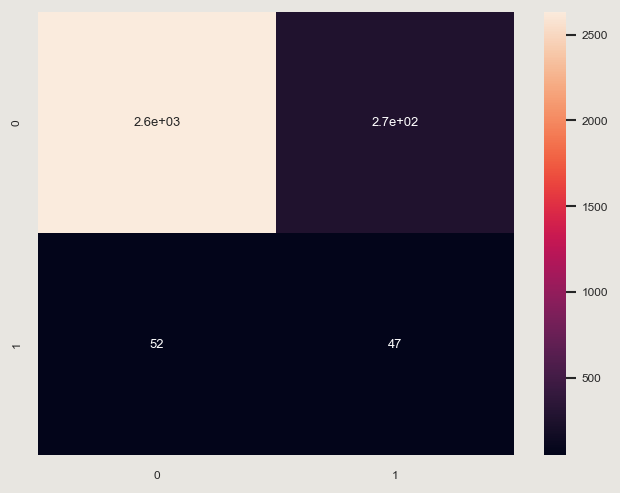

In [99]:
from xgboost import XGBClassifier
xgbSM = XGBClassifier(booster = 'gblinear', learning_rate = 1, n_estimators = 10)
xgbSM.fit(X_train_res, y_train_res)
y_test_pred12 = xgbSM.predict(X_test)
y_validate_pred12 = xgbSM.predict(X_validate)
y_train_pred12 = xgbSM.predict(X_train_res)
def print_score(label, prediction, x):
    if x == "train":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        train_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_res, prediction)}\n")
        test_recall.append(f"{recall_score(y_test, y_test_pred12) * 100:.3f}%")
        test_precision.append(f"{precision_score(y_test, y_test_pred12) * 100:.3f}%")
        test_f1score.append(f"{f1_score(y_test, y_test_pred12) * 100:.3f}%")
    elif x == "test":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        test_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
    elif x == "validate":
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("validation Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        validation_accuracy.append(f"{accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
algo_name.append('XG Boosting with SMOTE')
print_score(y_train_res, y_train_pred12.round(), "train")
print_score(y_test, y_test_pred12.round(), "test")
print_score(y_validate, y_validate_pred12.round(), "validate")
sns.heatmap(confusion_matrix(y_test, y_test_pred12.round()), annot=True)

In [100]:
df_accuracy = pd.DataFrame(list(zip(algo_name,train_accuracy,test_accuracy,test_recall,test_precision))
                           , columns=['Algorithm Name','Training Accuracy','Testing Accuracy','recall','Precision'])

In [101]:
df_accuracy

Algorithm Name Training Accuracy Testing Accuracy  \
0              Random Forest Classifier           100.00%           98.40%   
1   Random Forest Classifier with SMOTE           100.00%           96.17%   
2                   Logistic Regression            96.95%           97.37%   
3        Logistic Regression with SMOTE            84.93%           89.33%   
4                         Decision Tree           100.00%           97.73%   
5              Decision Tree with SMOTE           100.00%           95.53%   
6                Support Vector Machine            97.34%           97.70%   
7     Support Vector Machine with SMOTE            82.76%           86.33%   
8                Naive Bayes Classifier            95.73%           96.30%   
9     Naive Bayes Classifier with SMOTE            83.20%           91.03%   
10                          XG Boosting            96.86%           97.33%   
11               XG Boosting with SMOTE            77.14%           89.40%   

     recall Precision  
0   59.140%   84.615%  
1   73.737%   45.062%  
2   24.731%   71.875%  
3   67.677%   18.873%  
4   61.290%   64.045%  
5   67.677%   39.645%  
6   27.957%   92.857%  
7   72.727%   15.824%  
8   20.430%   33.929%  
9   68.687%   22.222%  
10  15.054%   93.333%  
11  47.475%   15.016%

# Testing

In [103]:
h = np.where(y == 0)[0].tolist()
df_0 = pd.DataFrame(X).iloc[h]
df_0.describe().loc[['mean','std']]
q = df_0.describe().loc[['mean','std']]
q

0           1            2          3           4
mean  299.973999  309.995570  1540.260014  39.629655  106.693717
std     1.990748    1.486846   167.394734   9.472080   62.945790

In [104]:
b = []
b.append(np.random.normal(loc =q[0][0] , scale = q[0][1], size = 1).tolist()[0])
b.append(np.random.normal(loc =q[1][0] , scale = q[1][1], size = 1).tolist()[0])
b.append(np.random.normal(loc =q[2][0] , scale = q[2][1], size = 1).tolist()[0])
b.append(np.random.normal(loc =q[3][0] , scale = q[3][1], size = 1).tolist()[0])
b.append(np.random.normal(loc =q[4][0] , scale = q[4][1], size = 1).tolist()[0])
np.array(b)

array([ 296.65740446,  311.50781854, 1766.95060059,   37.8688238 ,
         95.08928345])

In [105]:
classifierSM.predict(np.array([b]))

array([0], dtype=int64)

In [106]:
xgbSM.predict(np.array([b]))

array([0])

In [107]:
h = np.where(y == 1)[0].tolist()
df_0 = pd.DataFrame(X).iloc[h]
df_0.describe().loc[['mean','std']]
q = df_0.describe().loc[['mean','std']]
q

0           1            2          3           4
mean  300.886431  310.290265  1496.486726  50.168142  143.781711
std     2.071473    1.363686   384.943547  16.374498   72.759876

In [109]:
a= []
a.append(np.random.normal(loc =q[0][0] , scale = q[0][1], size = 1).tolist()[0])
a.append(np.random.normal(loc =q[1][0] , scale = q[1][1], size = 1).tolist()[0])
a.append(np.random.normal(loc =q[2][0] , scale = q[2][1], size = 1).tolist()[0])
a.append(np.random.normal(loc =q[3][0] , scale = q[3][1], size = 1).tolist()[0])
a.append(np.random.normal(loc =q[4][0] , scale = q[4][1], size = 1).tolist()[0])

In [111]:
np.array(a)

array([ 305.19761197,  310.28590572, 1223.8276659 ,   67.06936064,
         61.58706444])

In [113]:
classifierSM.predict(np.array([a]))

array([1], dtype=int64)

In [115]:
xgbSM.predict(np.array([a]))

array([0])